# Matplotlib

In [32]:

pip install seaborn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from matplotlib import pyplot as plt

In [34]:
x = [10, 20, 30, 40]
y = [0, 15, 10, 25]

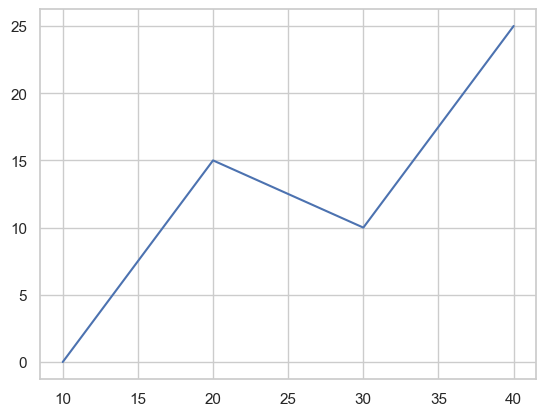

In [35]:
plt.plot(x, y);

# Seaborn

\#1. Seaborn updates `matplotlib`'s rc parameters to improve aesthetics

In [36]:
import seaborn as sns

In [37]:
sns.set() 

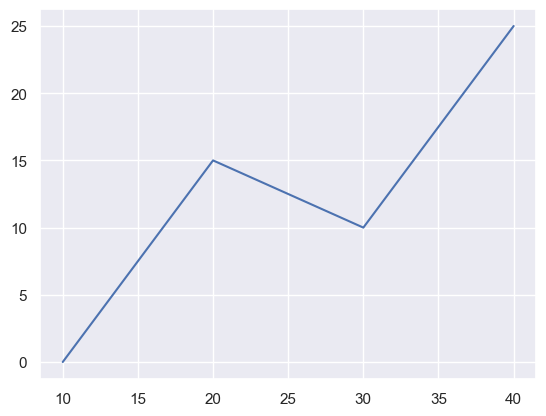

In [38]:
plt.plot(x, y);

In [39]:
sns.set_style("white")

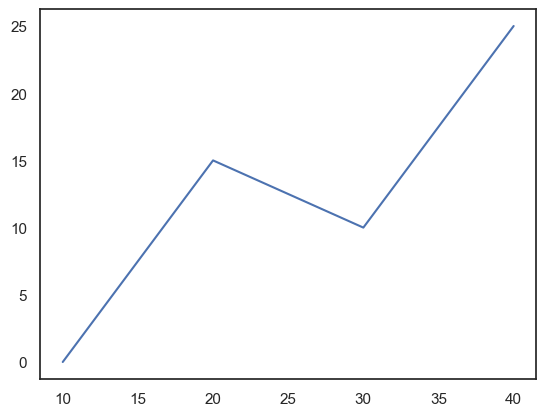

In [22]:
plt.plot(x, y);

#### Versions

In [40]:
import matplotlib
matplotlib.__version__

'3.9.0'

In [41]:
sns.__version__

'0.13.2'

## Seaborn with `pandas`

\#2. Let Seaborn group, aggregate, and plot your `pandas` dataframes

In [42]:
cars = sns.load_dataset('mpg')

In [46]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [47]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [43]:
type(cars)

pandas.core.frame.DataFrame

In [44]:
cars.dropna(inplace=True)

cars.shape

(392, 9)

In [45]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


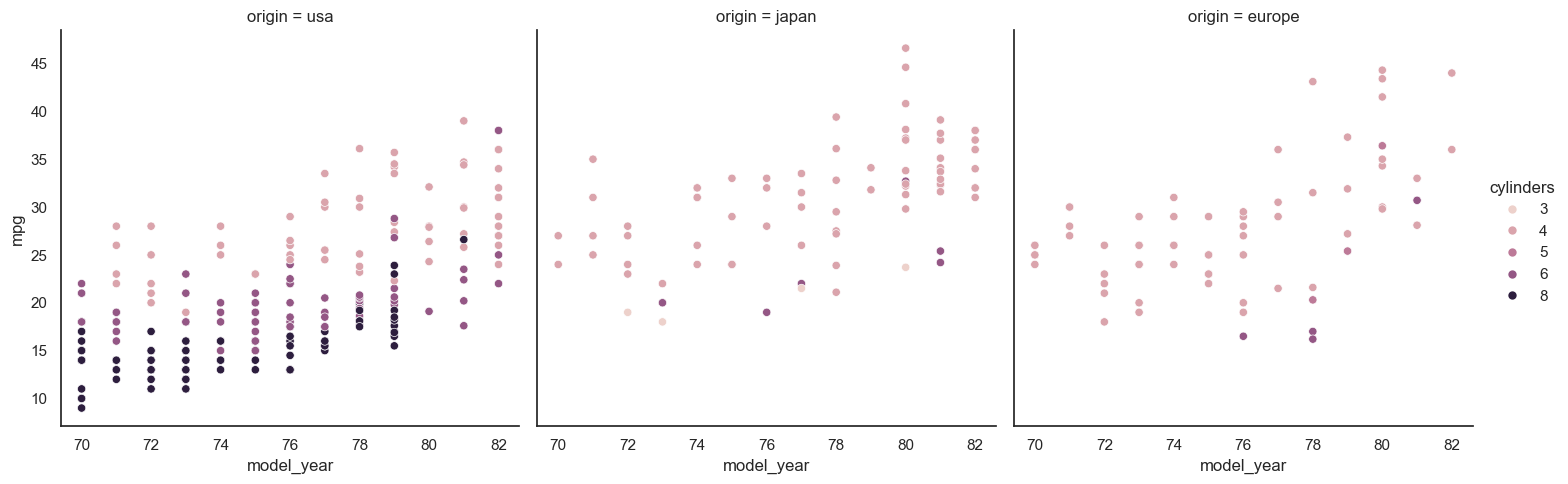

In [29]:
sns.relplot(x='model_year', y='mpg', col='origin', hue='cylinders', 
            data=cars);

## More Examples

\#3. Seaborn allows for additional plot types and easy plotting functionality

In [50]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(cyl_4.horsepower, cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(cyl_8.horsepower, cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (MPG)')

plt.annotate("4 Cylinders", (105, 32), color='b', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='r', fontsize=16, fontweight='bold')
plt.tight_layout()

TypeError: kdeplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 800x600 with 0 Axes>

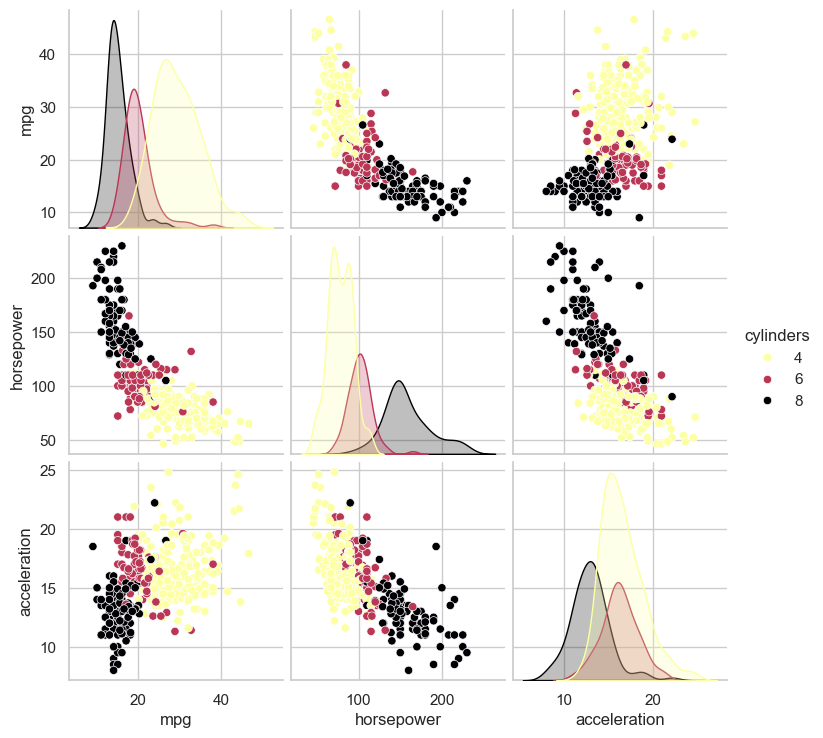

In [51]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])], 
             hue='cylinders', 
             vars=['mpg', 'horsepower', 'acceleration'], 
             palette='inferno_r'
            );

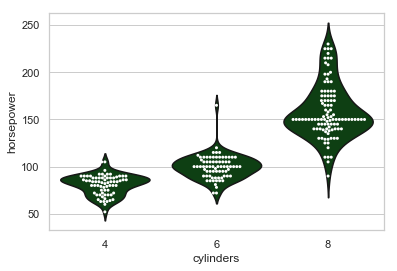

In [ ]:
usa = cars[cars.origin == 'usa']

sns.violinplot(x=usa.cylinders, y=usa.horsepower,
               scale='width', inner=None, color='xkcd:forest green'
              )
sns.swarmplot(x=usa.cylinders, y=usa.horsepower,
              color='white', size=3
             );

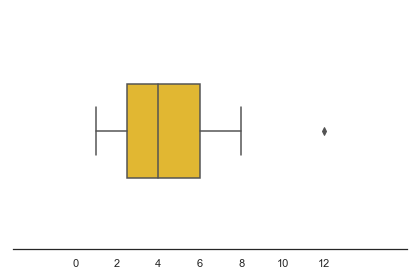

In [ ]:
sns.set_style('white')
pts = [1, 1.5, (7/3), 3, 3.75, 4.25, 5, 19/3, 8, 12]

plt.figure(figsize=(6,4))
sns.boxplot(pts, color='xkcd:golden yellow', width=0.4)
sns.despine(left=True)
plt.xlim(-3, 16)
plt.xticks(range(0,13,2))
plt.tight_layout();

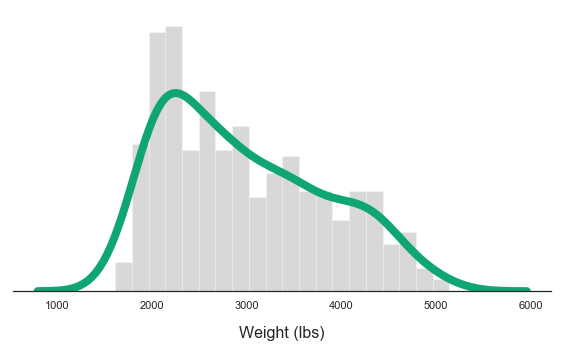

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(cars.weight, 
             bins=20,
             kde_kws={"lw": 8, 'color':'xkcd:bluish green'},
             hist_kws={'alpha': 0.3, 'color':'gray'}
            )

sns.despine(left=True)
plt.xlabel('Weight (lbs)', fontsize=16, labelpad=15)
plt.yticks([])
plt.tight_layout();

<Figure size 576x432 with 0 Axes>

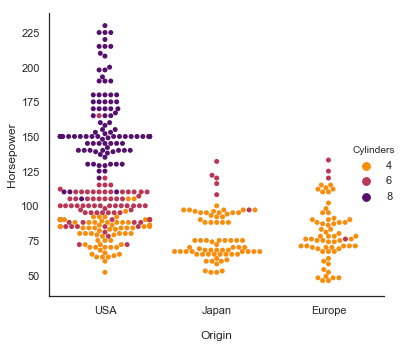

In [ ]:
plt.figure(figsize=(8,6))
g = sns.catplot(x='origin', y='horsepower', hue='cylinders', 
                kind='swarm', 
                palette=sns.color_palette('inferno_r', 3,),
                data=cars[cars.cylinders.isin([4, 6, 8])]
               )

plt.xlabel('\nOrigin')
plt.ylabel('Horsepower')
plt.gca().set_xticklabels(['USA', 'Japan', 'Europe'])
g._legend.set_title('Cylinders')
plt.tight_layout();